# Análise exploratória dos documentos oficiais

Sobre o que falam os documentos oficiais? Quais as palavras mais frequentes?
Este é um notebook para exploração inicial do texto dos documentos municipais.
Atualmente só mostra as palavras mais frequentes, mas há outras análises interessantes.
O exemplo é com o as Leis Municipais, porém qualquer documento oficial pode ser carregado para realizar a mesma análise.

### Algumas ideias para melhorar esse notebook:
- Separar os documentos por tópicos, por Latent Semantic Analysis (LSA) ou LDA, e calcular a frequência de palavras pra cada tópico
- Separar entidades (nome de pessoas, ruas) das outras palavras
- Rodar o Part of Speech Tagging (POS Tagging) do Spacy e calcular frequências para cada categoria (substantivo, adjetivo, etc)

### Algumas referências para ideias e melhorias:
- [Nuvem de palavras](https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-ao-processamento-de-linguagem-natural-com-baco-exu-do-blues-17cbb7404258)
- Explorar [como mudou](https://www.scientificamerican.com/article/explore-175-years-of-words-in-scientific-american/) o vocabulário da Scientific American em 175 anos de existência. E [extra](https://www.scientificamerican.com/article/how-to-turn-175-years-of-words-in-scientific-american-into-an-image/)
- [Tutorial de visualização de informações textuais](https://infovis.fh-potsdam.de/tutorials/infovis5text.html)
- [Tutorial de análise exploratória de texto](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_laws = pd.read_json('leis.json')
city_laws.drop(['documento'], inplace=True, axis=1)
print(city_laws.info())
print(city_laws.nunique())
city_laws

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
dtypes: object(4)
memory usage: 188.7+ KB
None
titulo       6033
categoria       8
resumo       4961
texto        6029
dtype: int64


,titulo,categoria,resumo,texto
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
...,...,...,...,...
6028,RESOLUÇÃO Nº 125/1980,Resoluções,DISPÕE SOBRE A CONCESSÃO DE TÍTULO DE CIDADÃO ...,Faço saber que a Câmara Municipal aprovou e eu...
6029,RESOLUÇÃO Nº 403/2003,Resoluções,AUTORIZA A MESA DIRETIVA DO PODER LEGISLATIVO ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6030,RESOLUÇÃO Nº 492/2014,Resoluções,INSTITUI A SEGUNDA SEMANA DO MÊS DE AGOSTO EM ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6031,RESOLUÇÃO Nº 382/2001,Resoluções,CRIA A MEDALHA VEREADOR DIVAL FIGUEIREDO MACHA...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."


In [3]:
city_laws.iloc[len(city_laws)-1, 3]

'A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:\n\nArt. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:\n\n"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.\n\n§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."\n\n"Art. 33 Compete, privativamente, ao Vice-Presidente:"\n\n"Art. 36 ...\n\nI - ...\n\ne) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presiden

In [17]:
import re
from nltk.corpus import stopwords

def clean_text(text, remove_accents=False, return_string=True) -> str or list:
    if isinstance(type(text), float):
        return ""

    # Remove ponctuation, digits and whitespaces
    text = re.sub(r"[0-9]+", " NUM ", text.lower())
    text = " ".join(re.findall(r"\b[A-Za-zÀ-ú]+[-A-Za-zÀ-ú]*", text))

    # Remove accents
    # TODO: Apparently this doesn't remove accents like "á", é" and so on.
    # Maybe it would be a good idea to remove those as well
    if remove_accents:
        nfkd_form = unicodedata.normalize("NFKD", text)
        text = "".join([char for char in nfkd_form if not unicodedata.combining(char)])

    # Remove stopwords
    nltk_stopwords = stopwords.words("portuguese")
    custom_stopwords = ['feira', 'santana', 'art', 'municipal', 'lei', 'r', 
    'prefeito', 'câmara', 'municipio', 'data', 'seguinte', 'disposições',
    'estado', 'bahia', 'vigor', 'secretário', 'decreto', 'projeto', 
    'iii', 'i', 'ii',  'contrário', 'presidente', 'artigo',
    'faço', 'parágrafo', 'executivo', 'gabinete', 'único', 'sanciono', 
    'desta', 'v', 'iv', 'autoria', 'através', 'deste', 'vice', 'autor',
    'qualquer', 'b', 'decretou', 'execução', 'sobre', 'das', 'decorrentes',
    'decreta', 'resolução', 'geral', 'uso', 'ato', 'diretiva', 'exercício',
    'seguintes', 'meio', 'm', 'c', 'correrão']
    all_stopwords = nltk_stopwords + custom_stopwords

    text = [word for word in text.split() if word not in all_stopwords]

    if return_string:
        return " ".join(text)
    else:
        return text

In [18]:
# TODO: The import depends on NLP analysis' PR
# from scripts.parsers import clean_text
text = ' '.join(city_laws['texto'].tolist())
text = clean_text(text, return_string=False)

unique_words_count = len(set(text))
print(f'Numero de palavras unicas no text: {unique_words_count}')

Numero de palavras unicas no text: 31823


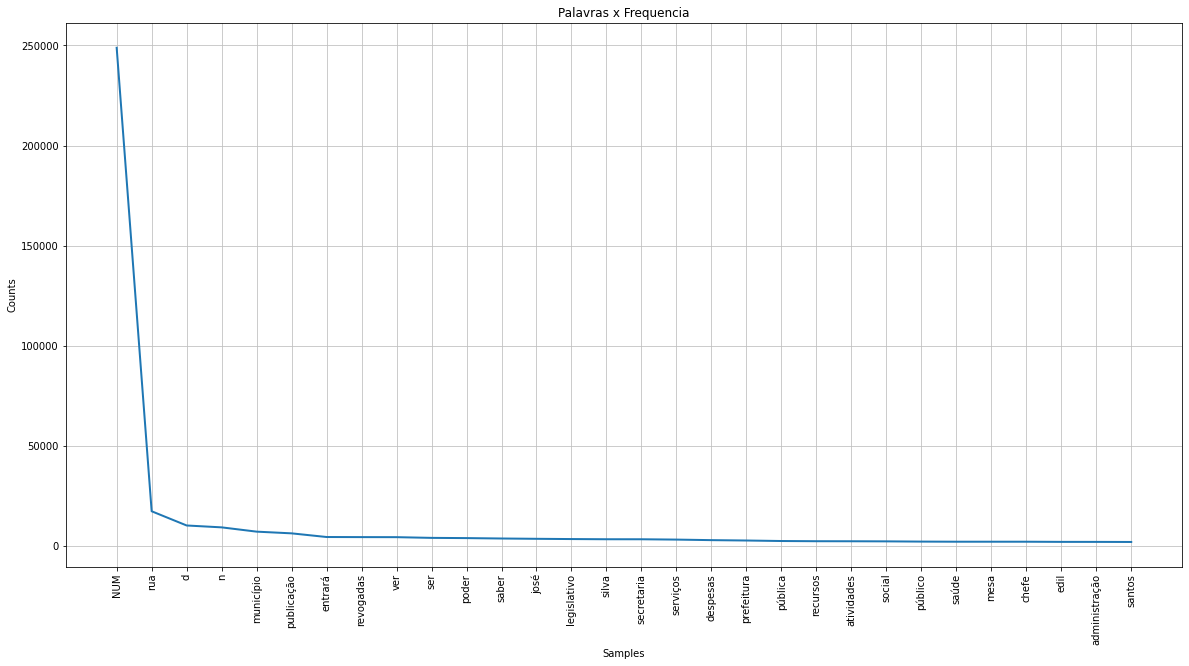

<AxesSubplot:title={'center':'Palavras x Frequencia'}, xlabel='Samples', ylabel='Counts'>

In [19]:
from nltk import FreqDist

plt.figure(figsize=(20,10))
fd = FreqDist(text)
fd.plot(30, title='Palavras x Frequencia', cumulative=False)